## Business objective
- Identify the potential cadidates accurately as much as possible who will join the company.

## Target Feature:
- Status = 'Joined' (cosidering as the positive class, 1)
- Status = 'Not Joined' (cosidering as the negative class, 0)
- Identify the potential cadidates accurately as much as possible who will actually join the company.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [129]:
df = pd.read_csv(r'C:\users\91842\Downloads\hr_data.csv')
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [8]:
df.shape

(8995, 18)

This dataset has total 8995 rows and 18 columns.

In [130]:
#dropping the unnecssary column:
df.drop(['SLNO','Candidate Ref'], axis=1, inplace=True)
df.head(2)

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined


In [161]:
df.describe()

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,Status
count,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000
mean,21.727036,39.541295,43.872964,40.641013,-1.582513,4.305163,30.011411,0.812790
std,25.912492,22.246786,29.954949,36.320094,19.760132,2.512629,4.041953,0.390102
min,0.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000,0.000000
25%,3.000000,30.000000,27.240000,21.805000,-8.810000,3.000000,27.000000,1.000000
50%,10.000000,30.000000,40.000000,35.420000,0.000000,4.000000,30.000000,1.000000
75%,33.000000,60.000000,54.290000,50.000000,0.000000,6.000000,34.000000,1.000000
max,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,60.000000,1.000000


- Duration to accept offer has a high standard vediation, which means there are people who accpets the offer within less no of days and also there are people who takes much more time to accept the offer. But 50% of the times people accepts the offer within 10 days.
- On an Avg 40% hike is being offered in CTC to the candidates.
- The Percent difference CTC is having very high std, which means there are few people who are getting very high hike wrt to what they expected and at the same time there are people with high expected CTC but getting offer with low CTC.  

In [13]:
df.isnull().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [131]:
df.drop_duplicates(inplace=True)
df.shape

(8851, 16)

There are duplicate rows present in the data:
- deleting them

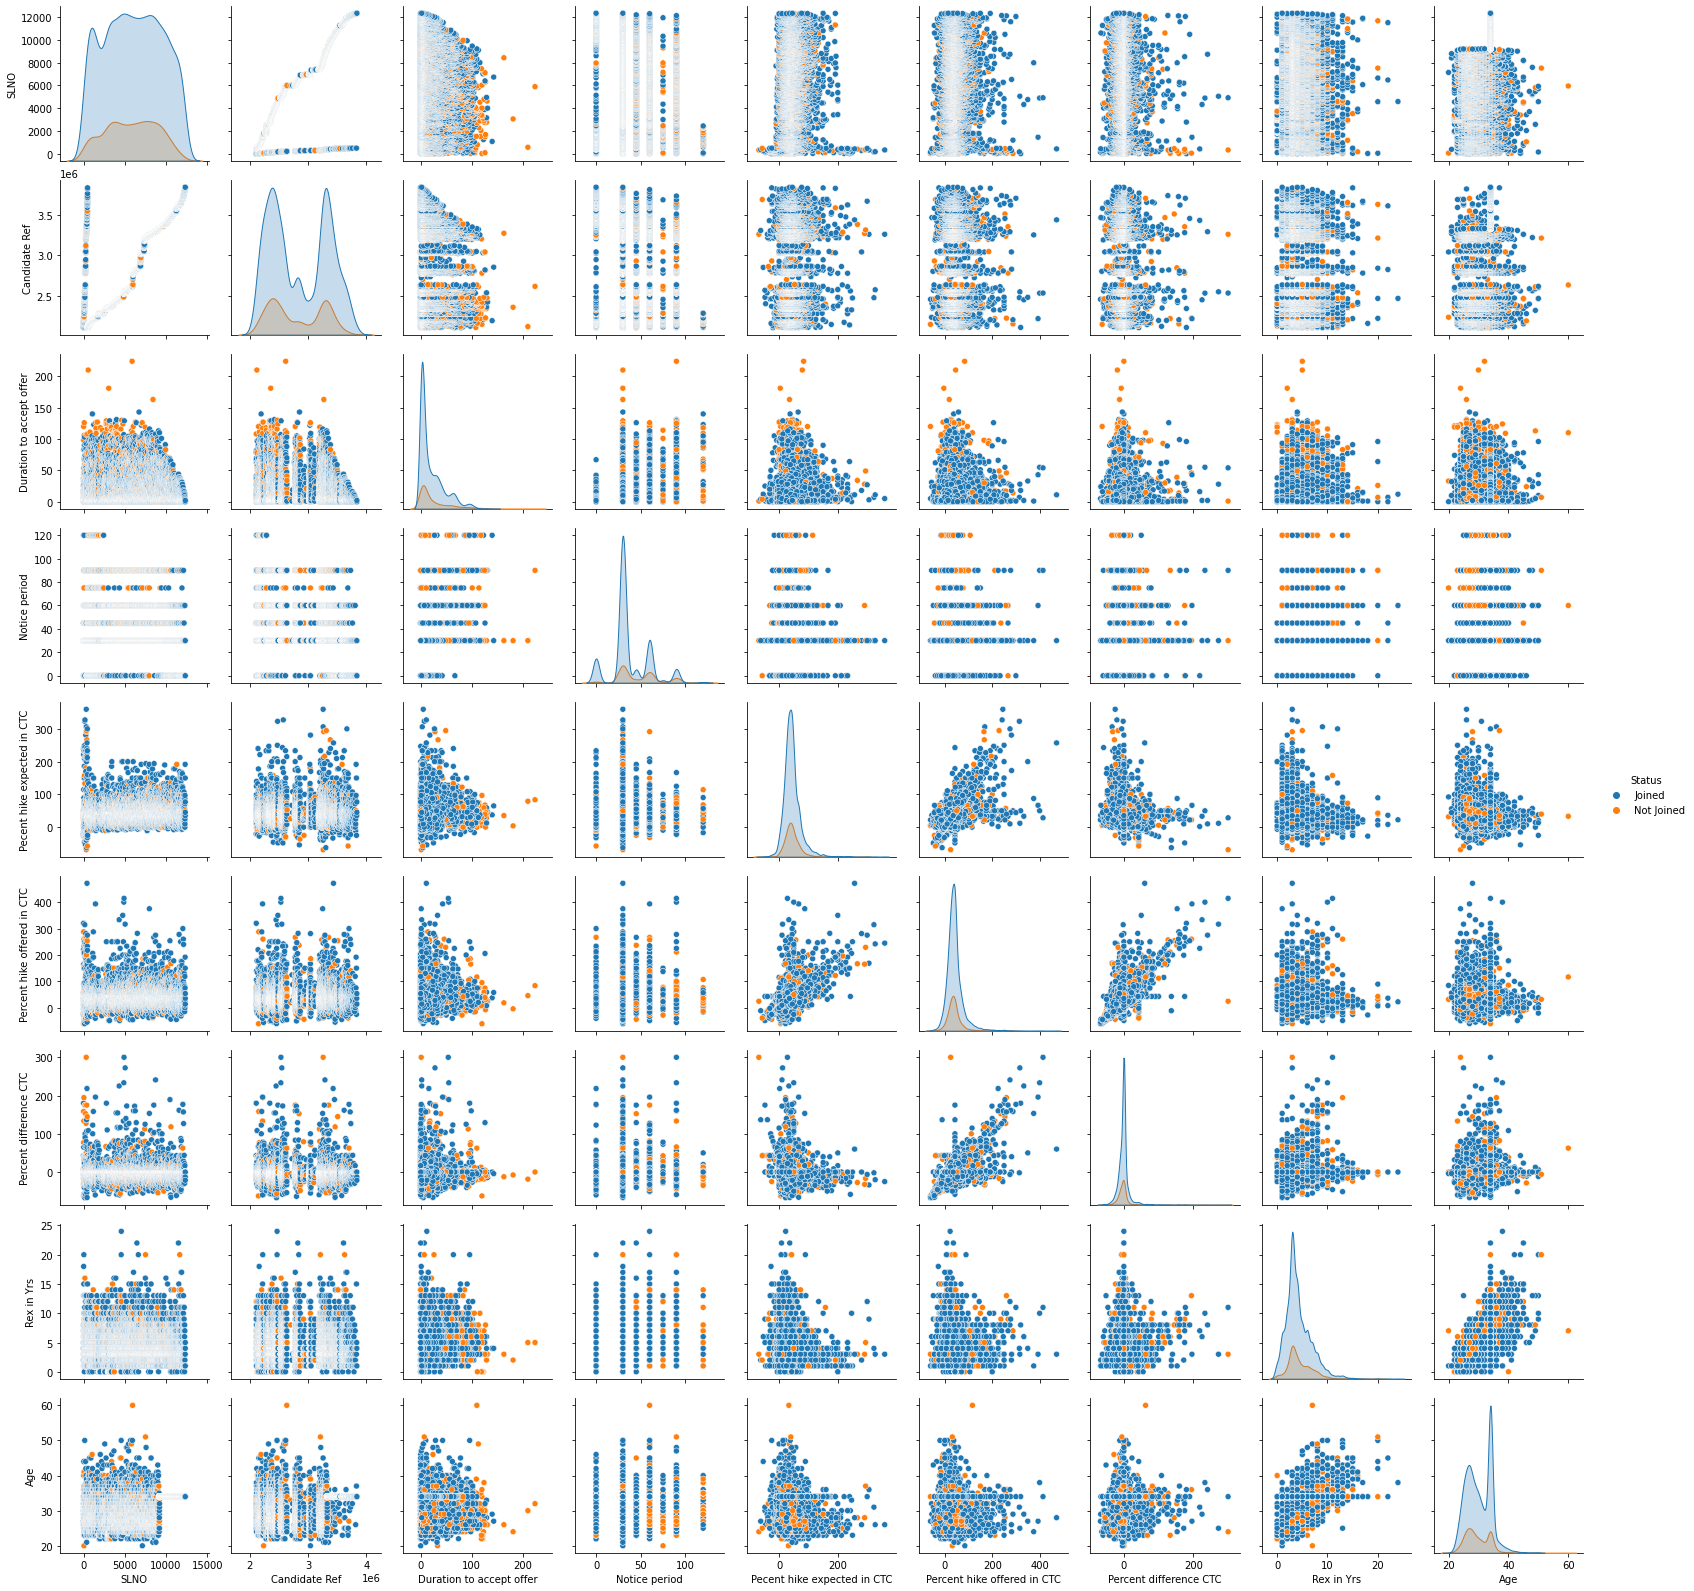

In [15]:
sns.pairplot(df, hue='Status');

#### Insights:
- We can see that there is lot of overlap in the data. In that case Logistic regression may not work very well as it tries to construct a linear separable plane for binary classification.
- We will at first try with KNN and then Logistic for model building purpose.
- But as per the question we need to predict the likelihood of a candidate joining the company, so for that we will apply Logistic Regression only as this algorith gives output in probability values.

#### Imbalance check:

In [25]:
(df['Status'].value_counts()/df.shape[0])*100

Joined        81.278952
Not Joined    18.721048
Name: Status, dtype: float64

So the ratio is like 81:19, which may not be considered as an imbalanced data. So, I am not applying any resampling technique like upsampling or downsampling here.

Let's check the numeriacl data based on the target column:

In [26]:
#let's divide the data based on the colm 'Joined' and 'Not Joined' And see how the data looks:
df.groupby('Status').mean()

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
Status,,,,,,,
Joined,20.907284,37.485405,43.867139,41.128624,-1.262127,4.258827,30.103003
Not Joined,25.286059,48.467109,43.898250,38.524013,-2.973494,4.506337,29.613760


#### Insights:
- It seems the avg duration to accept the offer for candidadtes who joins the company is lesser than the candidates who does not join the company.
- The avg Notice period for candidadtes who joins the company is lower than the candidates who does not join the company.
- There is not much differe in Pecent hike expected in CTC for both the types of the candidates.
- The avg Percent hike offered in CTC is higher for candidates who joins the company than the candidates who does not joins the company.
- The avg 'Percent difference CTC' is higher for the candidates who does not join the company. Which means what hike expected in CTC and what hike offered by the company in CTC there is much difference for those candidates who does not join the company.
- Avg experice of the 2 types of the candidates is almost looks similar and avg Age also looks similar.

#### Univariate analysis:

C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


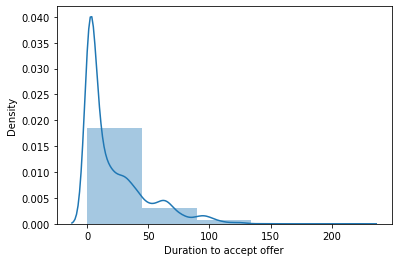

In [30]:
#How Duration to accept the offer by candidate looks like:
sns.distplot(df['Duration to accept offer'], bins=5);

- Duration to accept offer has a long right tail, which indicates there are few people who takes much more time to accpet the offer. Whereas, avg duration to accept the offer is in between 0-40 days.

C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


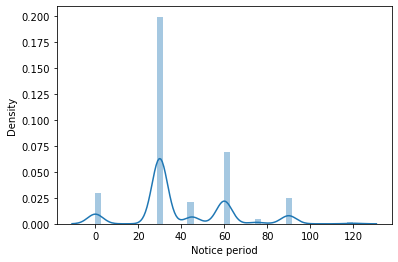

In [32]:
#Notice period of previous employer
sns.distplot(df['Notice period']);

- Most of the candidates are having Notice period of 1 month or 2 months.
- There are also very few immediate joiners are present who can join within 1 week.

In [33]:
df.head(1)

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined


C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


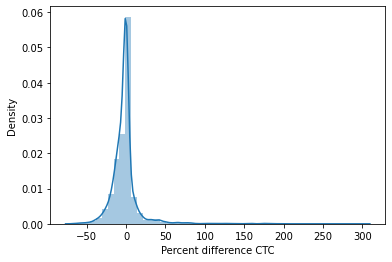

In [34]:
#look at the 'difference between expected and offered':
sns.distplot(df['Percent difference CTC']);

- 'Percent difference CTC' looks normally distributed, which means that difference between expected CTC and offered CTC 
is alomst equally distributed for both the cases when - Expecting more but offer is less (right hand side from mean) and  Expecting less but offer is high (left hand side from mean)
- So there are both the cases existing in the dataset.

C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


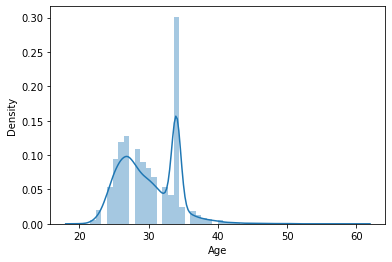

In [35]:
#Age:
sns.distplot(df['Age']);

- Mose of the candidates are of age around 25-35, still there are very few candidates are of age greater than 40 also.
- There is a very high spike at the age around 35, which means people of this age are appearing more for the interviews.

Univariate of the categorical columns:

<AxesSubplot:ylabel='Offered band'>

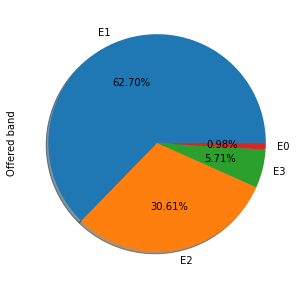

In [38]:
#Offered band
plt.figure(figsize=(5,5))
(df['Offered band'].value_counts() * 100 / len(df)).plot.pie(autopct='%1.2f%%', shadow=True)

- Most of the time company is offering for band E1.
- Now bands can be with respect to position here, offered package etc.
- Suppose, There are bandwidths given as - 'Developer', 'Senior Developer', 'TL', 'Project Manager' as E0 < E1 < E2 < E3, in that case we can say that this company is recruting mostly for 'Senior Developer' position. 
- and then for E2 band (for 'TL' position) and E3 (say for 'Project Manager')
- And the company is recruting the least for band E0.

- So, if the offered position does not match the candidate's criteria then if may impact the cadidate's decision of joining that comapny.

<AxesSubplot:ylabel='Joining Bonus'>

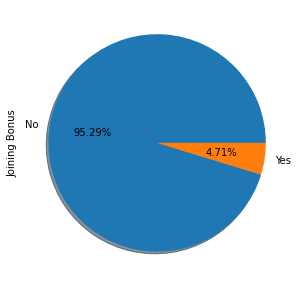

In [39]:
#Joining bonus
plt.figure(figsize=(5,5))
(df['Joining Bonus'].value_counts() * 100 / len(df)).plot.pie(autopct='%1.2f%%', shadow=True)

- 95% of the times the company is not offering any joining bonus to the candidates. Only 5% offering joining bonus.

<AxesSubplot:ylabel='Candidate relocate actual'>

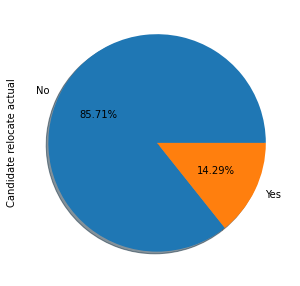

In [40]:
#Candidate relocates actual: relocating required or not:
plt.figure(figsize=(5,5))
(df['Candidate relocate actual'].value_counts() * 100 / len(df)).plot.pie(autopct='%1.2f%%', shadow=True)

- Most of the time candidates do not prefer to relocate from his/her current location.
- But there may be special scenarios where candidates would like to relocate like after getting married they want to change their current job because they want to relocate to their spouse's location.
- So those candidates fall under this 14.3%.

<AxesSubplot:ylabel='Gender'>

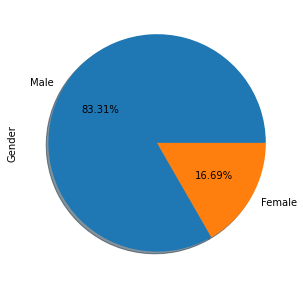

In [41]:
#Gender: Gender of candidate :
plt.figure(figsize=(5,5))
(df['Gender'].value_counts() * 100 / len(df)).plot.pie(autopct='%1.2f%%', shadow=True)

- Here we can see there is a big difference in the gender of the candidates
- Only 17% of the candiddates are female.

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


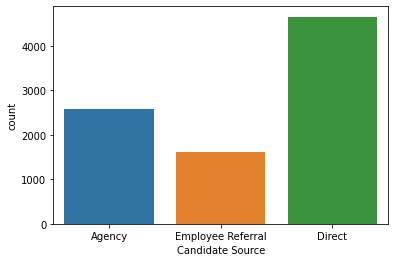

In [44]:
#Candidate Source: How candidate applied or reached :
sns.countplot(df['Candidate Source']);

- Maximum candidates applied directly for the job offerings. 
- Which means they get to know about the vanacy wither from the company's website, or from different job portals, or from professional netwroking sites like Linkedin
- There are some candidates who are getting referred by the company's employees who are working in that company.
- Candidates are also pplying for the jobs through some third party company or agencies.

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


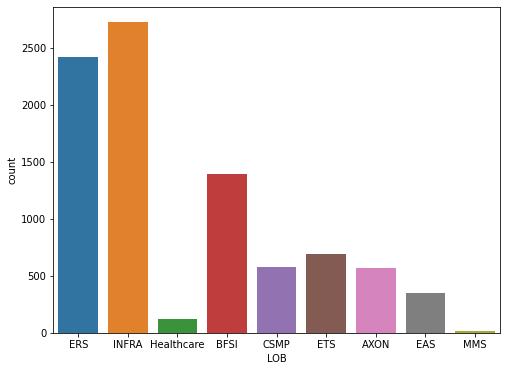

In [50]:
#LOB:
plt.figure(figsize=(8,6));
sns.countplot(df['LOB']);

- The recruitment drives are happening mostly for domains or LOB like INFRA, ERS and BFSI
- Very few for MMS and Healthcare.

Bivaraite analysis:

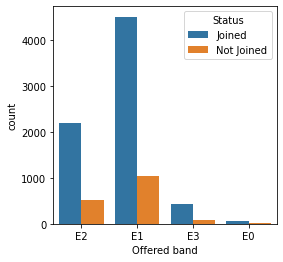

In [51]:
#offered band vs status
plt.figure(figsize=(4,4));
sns.countplot(x=df['Offered band'], hue=df['Status']);
plt.show()

- Company is offering mostly for band E1 and it seems they are joining the most. 
- The company is offering band E0 the least but there also not all are joining, approx 50% are joining among those offerings.

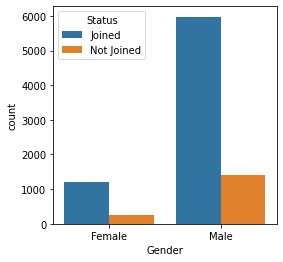

In [52]:
#Gender vs status
plt.figure(figsize=(4,4));
sns.countplot(x=df['Gender'], hue=df['Status']);
plt.show()

- Though female candidates are appearing less in comparison to male candidates for the recruitment drives, among them almost one-fourth are joining the company.
- Male candidates are appearing the most for the interviews and here also among them almost one-fourth are joining the company.
- So the joining proportion for both should be same.

In [62]:
df.groupby(['Gender','Status']).agg({'Status':'count'})

Status
Gender Status            
Female Joined        1218
       Not Joined     259
Male   Joined        5976
       Not Joined    1398

In [55]:
df['Gender'].value_counts()

Male      7374
Female    1477
Name: Gender, dtype: int64

- So out of total 1477 female candidates 1218 Joined and only 259 did not join
- And out of total 7374 male candidates 5976 Joined and  1398 did not join
- So the porportion of female joined and male joined looks like:

In [64]:
female_prportion = round((1218/1477)*100,2)
male_prportion = round((5976/7374)*100,2)
print('Proportion of female candidtes joined is:', female_prportion)
print('Proportion of male candidtes joined is:', male_prportion)

Proportion of female candidtes joined is: 82.46
Proportion of male candidtes joined is: 81.04


Insights:
- So there is not much difference in proportion of candiadtes joing based on their Gender.
- So irrespective of Gender candidates are joining.

In [67]:
#difference between expected and offered CTC vs status
df.groupby('Status').agg({'Percent difference CTC':['mean','max','min','std']})

Percent difference CTC                         
                             mean    max    min        std
Status                                                    
Joined                  -1.262127  300.0 -67.27  19.718203
Not Joined              -2.973494  300.0 -62.50  19.887349

- Candidates who joins the company, have a low difference between what CTC they expected and what CTC they were offered
- But for candidates who does not join the company, have a higher difference between expected CTC and final offered CTC.
- So if there is too much difference between what CTC candidate expectes and what they were offered in that case it may impact their decision wrt joining to that company. 

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Percent difference CTC'>

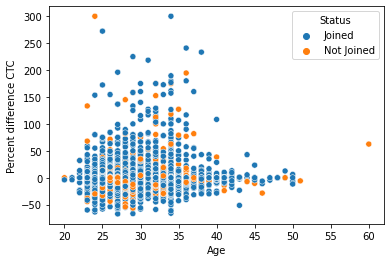

In [68]:
sns.scatterplot('Age','Percent difference CTC',hue='Status',data=df)

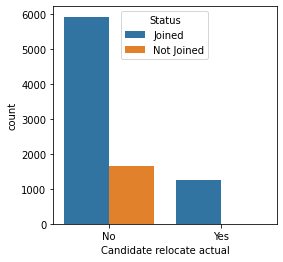

In [69]:
#Candidate relocates actual: relocating required or not vs Status
plt.figure(figsize=(4,4));
sns.countplot(x=df['Candidate relocate actual'], hue=df['Status']);
plt.show()

- It seems all those candidates who might have appreaed for the interview because they want relocation, among such candidates who got the offer , have all joined the company.
- And among those who did not want to relocate , almost one-third of them are not joining the company.

Multivalraite:

In [83]:
df.head(1)

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined


<AxesSubplot:xlabel='Pecent hike expected in CTC', ylabel='Percent hike offered in CTC'>

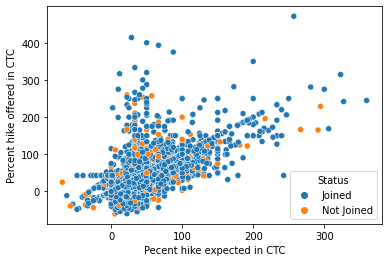

In [85]:
sns.scatterplot('Pecent hike expected in CTC','Percent hike offered in CTC',hue='Status',data=df)

Check the multicollinearuty between the independent features:

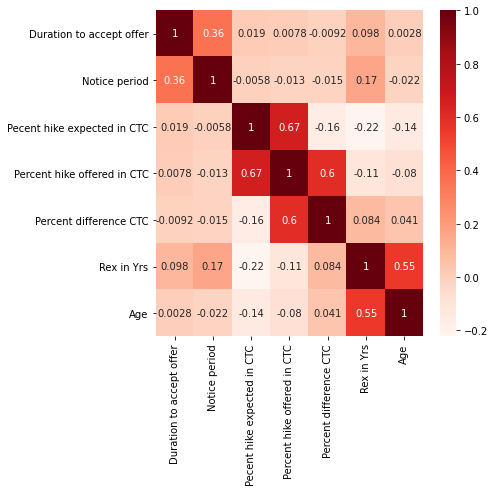

In [92]:
plt.figure(figsize=(6,6))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Insights:
- Age and Rex in Yrs are highly positively correlated. Hence we will consider either 1 of them.
- Duration to accept offer and Notice Period are highly positively correlated. Hence we will consider either 1 of them.
- Percent hike expected in CTC has very high positive correlation with Percent hike offered in CTC. so, we will consider either 1 of them.
- Percent difference CTC is also pisitively correlated with Percent hike offered in CTC. 
- We will take any 1 of these 3 

#### Define any hypothesis if possible: chi2 Association test to establish if there is any relation between Candidate relocate actual and Joining status:
- Check if 'Candidate relocates actual' has any relation with Joining status or not:

In [156]:
#now chech if 'fare' has any relation with 'survived':
pd.crosstab(df['Candidate relocate actual'], df['Status'], normalize='index')

Status,0,1
Candidate relocate actual,,
No,0.218429,0.781571
Yes,0.000000,1.000000


**Note:**
- wrt normalize='index', This represents Given the 'Candidate relocates actual' what is the chance of joining.
- If the Candidate relocate actual is 'Yes' then there is 100% chance of joining the company.
- If the Candidate relocate actual is 'No' then there is only 78% chance of joining the company and 22% chance of not joining.

#### Now do the chi2 test to establish the claim - Candidate relocate actual and Joining status:

In [160]:
#Now do the chi2 test to establish the claim - Fare and Survival is related or not:
from scipy.stats import chi2_contingency as chi

#
obs_val = pd.crosstab(df['Candidate relocate actual'], df['Status'])
chi(obs_val)

#store the results into diff variables:
c,p,dof,exp_val = chi(obs_val)

#check the p-value of the test:
if p<0.05:
    print('Reject the Null hypothesis')
    print('There is a relation between Candidate relocate actual and Joining status')
else:
    print('Do not reject the Null hypothesis')
    print('There is no relation Candidate relocate actual and Joining status')

Reject the Null hypothesis
There is a relation between Candidate relocate actual and Joining status


#### Conclusion: Based on teh chi2 test results we can say that there might be a relation between Candidate relocate actual and Joining status

Data preprocessing and feature selection based on VIF score:

In [132]:
x_features = list(df.columns)
x_features.remove('Status')
x_features

['DOJ Extended',
 'Duration to accept offer',
 'Notice period',
 'Offered band',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Percent difference CTC',
 'Joining Bonus',
 'Candidate relocate actual',
 'Gender',
 'Candidate Source',
 'Rex in Yrs',
 'LOB',
 'Location',
 'Age']

Encodnig the categorical columns:

In [133]:
encoded_data = pd.get_dummies(df[x_features], drop_first=True)
encoded_data.shape

(8851, 34)

Scale the data:

In [134]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(encoded_data)

Check the VIF score for each column:

In [95]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = encoded_data.columns

#let's check the values
vif

,vif,Features
0,1.323837,Duration to accept offer
1,1.231292,Notice period
2,16.706922,Pecent hike expected in CTC
3,25.149283,Percent hike offered in CTC
4,14.278589,Percent difference CTC
5,2.961255,Rex in Yrs
6,1.506997,Age
7,1.206324,DOJ Extended_Yes
8,25.805916,Offered band_E1
9,25.441535,Offered band_E2


Prepare x and y for model:

In [135]:
encoded_data2 = encoded_data.drop(['Pecent hike expected in CTC','Percent hike offered in CTC','Percent difference CTC','Offered band_E1',
                   'Offered band_E2','Offered band_E3','LOB_INFRA','Location_Bangalore','Location_Chennai','Location_Gurgaon',
                   'Location_Hyderabad','Location_Kolkata','Location_Mumbai','Location_Noida','Location_Pune'], axis=1)
encoded_data2.head()

,Duration to accept offer,Notice period,Rex in Yrs,Age,DOJ Extended_Yes,Joining Bonus_Yes,Candidate relocate actual_Yes,Gender_Male,Candidate Source_Direct,Candidate Source_Employee Referral,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_MMS,Location_Cochin,Location_Others
0,14,30,7,34,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,18,30,8,34,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,3,45,4,27,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,26,30,4,34,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,1,120,6,34,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0


In [136]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(encoded_data2)

In [102]:
y = df['Status']

In [103]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size= 0.20, random_state=42)

# let's fit the data into kNN and see how well it performs:
knn_clf1 = KNeighborsClassifier()

# fit the model
knn_clf1.fit(x_train, y_train)

# predict
y_pred = knn_clf1.predict(x_test)

# check the accuracy
print("The accuracy score is : ", accuracy_score(y_test, y_pred))

The accuracy score is :  0.8012422360248447


In [107]:
cm = confusion_matrix(y_test, y_pred)
print('The confusin matrix:\n', cm)
print('The overall report:\n', classification_report(y_test, y_pred))

The confusin matrix:
 [[1344   87]
 [ 265   75]]
The overall report:
               precision    recall  f1-score   support

      Joined       0.84      0.94      0.88      1431
  Not Joined       0.46      0.22      0.30       340

    accuracy                           0.80      1771
   macro avg       0.65      0.58      0.59      1771
weighted avg       0.76      0.80      0.77      1771



Now I will apply gridsearch for hyperparameter tuning to improve the accuarcy of the model :

In [108]:
# set the tuning parameters
tuned_parameters = [{'metric':['euclidean','minkowski'],
                     'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
                    'n_neighbors':[3,5,7,9,10,11,12,13]}]


# create another instance to use for the Gridsearhcv
knn_cv = KNeighborsClassifier()


# create a GridSearchCV instance
clf = GridSearchCV(knn_cv,
                   tuned_parameters,
                   cv=10,
                   scoring='accuracy')

# fit the train set to this GridSearchCV
clf.fit(x_train,y_train)


# get the best parameters from GRSCV
print('Best parameters are:', clf.best_params_)
print('Best score is:', clf.best_score_)

Best parameters are: {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 12}
Best score is: 0.8155367231638417


In [109]:
# Now use the above received paramets and run the model
knn_cv = KNeighborsClassifier(metric='euclidean', n_neighbors=13)

# fit the model
knn_cv.fit(x_train, y_train)

# predict
y_pred_cv = knn_cv.predict(x_test)

# check the accuracy
print('The overall report:\n', classification_report(y_test, y_pred_cv))

The overall report:
               precision    recall  f1-score   support

      Joined       0.83      0.98      0.90      1431
  Not Joined       0.64      0.17      0.27       340

    accuracy                           0.82      1771
   macro avg       0.74      0.57      0.58      1771
weighted avg       0.80      0.82      0.78      1771



In [112]:
cm = confusion_matrix(y_test, y_pred_cv)
print('The confusin matrix:\n', cm)

The confusin matrix:
 [[1399   32]
 [ 283   57]]


#### Conclusion based on KNN: Best model with hyper parameter tuing

Without hyper parameter tuning:
- Without hyper parameter tuning model accuracy is 80%, which means 80% of the data is being calssified correctly by the model
and also F1-Score is not bad, 88%
- For class 'Joined' RECALL and Precision both are good.
- 98% of the posotive class ('Joined') are correctly classified by the model
- But here TN are high =75, next I want to minimize my TN. I don't want to lose a potential candidate by misclassifying them
- This I have improve by apply hyperparameter tuning

With hyper parameter tuning:
- Now TN are less (57) in compared to the previous model.
- Model accuracy has improved from 80% to 82%.
- F1-Score for positive class has improved from 88% to 90%, which is a good thing.
- Recall for positive calss ('Joined') is also improved from 94% to 98%
- Which means 98% of the positive class data is being classified correctly by the model. 
- But here Precision has been reduced by 1%.

#### Now let's apply Logistic Regression on this data and see how it performs: As we need to predict the likelihood of a candidate joining the company we will go with Logistic regression

Logistic regression:

In [140]:
#encoding of the categorical dependent variables:
df['Status'] = df['Status'].map(lambda x: 1 if x=='Joined' else 0)
df['Status'].value_counts()
y = df['Status']

#scale
scalar = StandardScaler()
X_scaled = scalar.fit_transform(encoded_data2)

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size= 0.20, random_state=42)

#create an instance
LR_clf = LogisticRegression()

#fit the train data to the model
LR_clf.fit(x_train, y_train)

#predict using test set
y_pred_LR = LR_clf.predict(x_test)

#check the accuracy of the model
cm = confusion_matrix(y_test, y_pred_LR)
print('The confusin matrix:\n', cm)
print('The overall report:\n', classification_report(y_test, y_pred_LR))

The confusin matrix:
 [[  15  325]
 [  12 1419]]
The overall report:
               precision    recall  f1-score   support

           0       0.56      0.04      0.08       340
           1       0.81      0.99      0.89      1431

    accuracy                           0.81      1771
   macro avg       0.68      0.52      0.49      1771
weighted avg       0.76      0.81      0.74      1771



#### What is the probability that a candidate will join or will not join the company: 

In [151]:
#predict using the test set:
LR_clf.predict_proba(x_test)[:5]

array([[0.30888832, 0.69111168],
       [0.19225457, 0.80774543],
       [0.14027587, 0.85972413],
       [0.30086398, 0.69913602],
       [0.217261  , 0.782739  ]])

In [154]:
#store the predicted probabilites into a dataframe:
proba_df = pd.DataFrame({"Actual":y_test,
                      "Predctied_proba_Joined":LR_clf.predict_proba(x_test)[:,1],
                      "Predctied_proba_Not Joined":LR_clf.predict_proba(x_test)[:,0]})
proba_df

,Actual,Predctied_proba_Joined,Predctied_proba_Not Joined
2606,1,0.691112,0.308888
7887,1,0.807745,0.192255
170,1,0.859724,0.140276
2532,1,0.699136,0.300864
2442,0,0.782739,0.217261
...,...,...,...
2789,1,0.814600,0.185400
1165,1,0.797869,0.202131
6580,1,0.853757,0.146243
5247,1,0.885957,0.114043


# Conclusion on the likelihood of a candidate joining the company (Based on Logistic Model):
- So now based on this probability values we can infer that what is the likelihood that a candidate will join the company or not.
- Suppose for the index id 2789, the 'Predctied_proba_Joined' is 0.8146, hence we can say that there is 81.46% chance that this candidate will join the company and there is only 18.5% chance that this candidate will not join the company.